# Union-Find

Union-Find 자료구조는 여러 집합이 존재할 때, 각 집합의 원소들을 효율적으로 관리하고, 두 집합을 합치거나 어떤 원소가 어떤 집합에 속해 있는지를 판별하는 데 사용된다.

    
## 함수:

- find(i):

    - 특정 원소가 속한 집합(또는 그 집합의 대표 원소)을 찾는 연산이다. 주로 해당 원소의 부모를 따라가면서, 부모가 자기 자신인 원소를 찾을 때까지 반복한다. 경로 압축을 사용하면 Find 연산의 시간 복잡도를 효율적으로 관리할 수 있다.
       
    - 이 함수는 재귀적으로 요소 `i`가 속한 집합의 루트 대표를 찾는다. `ptr[i]`가 음수일 경우 (`ptr[i] < 0`), `i` 자체가 루트임을 나타내며, `i`를 반환한다. 그게 아니면 `i`의 루트를 재귀적으로 찾아 업데이트한 후 해당 루트를 반환한다.

- union(r1, r2, big):

    - 두 집합을 하나로 합치는 연산이다. 두 집합의 대표 원소를 찾아서 하나의 집합으로 만든다. 트리의 높이를 최소화하면서 Union 연산을 효율적으로 수행할 수 있습니다.

   - 이 함수는 두 개의 루트 `r1`과 `r2`를 가진 집합을 합병한다. `ptr` 배열에서 작은 집합을 큰 집합에 병합하여 효율성을 유지한다. `ptr`를 적절히 업데이트하고 가장 큰 집합 크기를 유지하는데, 이 값은 `big_list`에 `big / N`의 정규화된 값으로 추가된다. 함수는 업데이트된 루트 `r1`, `r2` 및 현재 `big` 값을 반환한다.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def find(i):
    if ptr[i]<0:
        return i
    else:
        ptr[i] = find(ptr[i])
        return ptr[i]

In [9]:
def union(r1,r2,big):
    if r2 != r1:
        if(ptr[r1]>ptr[r2]):
            ptr[r2] += ptr[r1]
            ptr[r1] = r2
            r1 = r2
        else:
            ptr[r1] += ptr[r2]
            ptr[r2] = r1
        if -ptr[r1]>big:
            big = -ptr[r1]
        big_list.append(big / N )
    return r1, r2, big

In [10]:
L = 256
N = L ** 2
Kmax = 4
K = np.empty(N, int)
nn = np.empty([N, Kmax], int)
for i in range(N):
    nn[i][0] = i-1+L*(i%L==0)
    nn[i][1] = i+1-L*(i%L==L-1)
    nn[i][2] = i-L+N*(i//L==0)
    nn[i][3] = i+L-N*(i//L==L-1)
ptr = np.empty(N, int)


order = np.empty(N,int)
for i in range(N):
    order[i] = i
np.random.shuffle(order)


big = 0
big_list = [0] # 처음에는 최대 클러스터 크기 그리기
x_list = []
for i in range(N):
    ptr[i]=-N-1
for i in range(N):
    r1,s1 = order[i],order[i]
    # print(r1, s1) r1: root라고 취급, s1 = 주변에 있는거 확인
    ptr[s1]=-1
    for j in range(Kmax):
        s2=nn[s1,j]
        if ptr[s2]!=-N-1:
            r2=find(s2)
            r1,r2,big = union(r1,r2,big)
    x_list.append(i / N)

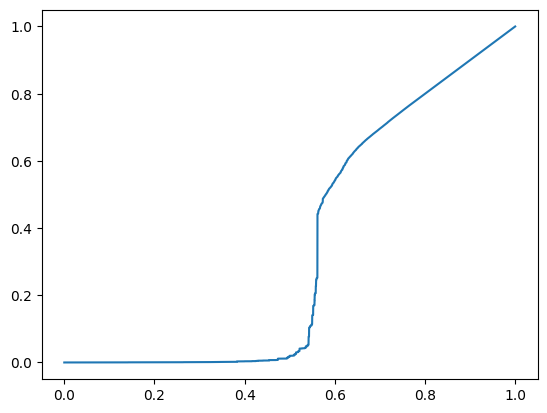

In [11]:
plt.plot(x_list, big_list)